# Options Pricing with Binomial Tree Model

## Objective:

The purpose of this project is to utilize a 3 step binomial tree model to price a hypothetical 1 year american put option whose underlying asset is Amazon stock. The risk-free rate is assumed to be equal to the 10 Year Treasury Rate (4.78%).  

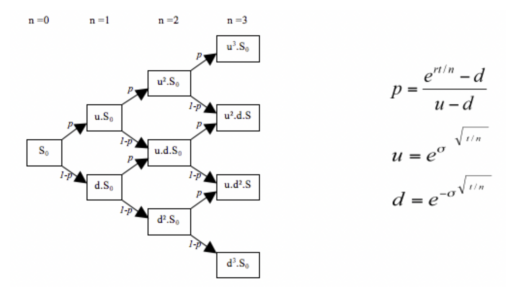

In [16]:
from PIL import Image
import matplotlib.pyplot as plt

# Specify the full path to the image on your desktop
desktop_path = "/Users/mazin/Desktop"
image_path = desktop_path + "/3-step binomial tree.png"

# Open the image file
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()


## Step 1: Importing requires libraries 

In [9]:
import numpy as np
import pandas as pd

## Step 2: Importing Amazon stock data

In [10]:
# Specify the file path
file_path = "/Users/mazin/Desktop/data/AMZN.csv"

# Load the CSV file into a Pandas DataFrame
data = pd.read_csv(file_path)

# Display the first and last few rows of the DataFrame
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-10-07,15.762000,15.767000,15.487000,15.501500,15.501500,41664000
1,2013-10-08,15.575000,15.577500,15.013500,15.161500,15.161500,63324000
2,2013-10-09,15.171000,15.175000,14.825000,14.911500,14.911500,64948000
3,2013-10-10,15.231500,15.335000,15.129500,15.258500,15.258500,51102000
4,2013-10-11,15.238500,15.546500,15.192000,15.544500,15.544500,43262000
...,...,...,...,...,...,...,...
2512,2023-09-29,128.199997,129.149994,126.320000,127.120003,127.120003,62377600
2513,2023-10-02,127.279999,130.470001,126.540001,129.460007,129.460007,48029700
2514,2023-10-03,128.059998,128.520004,124.250000,124.720001,124.720001,51565000
2515,2023-10-04,126.059998,127.360001,125.680000,127.000000,127.000000,44203900


## Step 3: Calculating historical volatility of Amazon daily closing prices 

In [18]:
# Convert the 'Date' column to datetime format if it's not already
data['Date'] = pd.to_datetime(data['Date'])

# Define the start and end dates 
start_date = '2022-10-05'
end_date = '2023-10-05'

# Filter the DataFrame to include only rows within the date range
filtered_data = data[(data['Date'] >= start_date) & (data['Date'] <= end_date)]

# Calculate the standard deviation for the filtered 'Adj Close' values
std_deviation = filtered_data['Adj Close'].std()

# Print the result
print("Standard Deviation of Amazon Stock:", std_deviation)


Standard Deviation of Amazon Stock: 17.382635444232122


In [19]:
# Calculate the mean (average) of the "Adj Close" column
mean = filtered_data["Adj Close"].mean()

# Calculate the standard deviation as a percentage
std_deviation_percentage = (std_deviation / mean) * 100

# Print the result
print("Standard Deviation as Percentage:", std_deviation_percentage)

Standard Deviation as Percentage: 15.641349717878416


## Step 4: Calculating up and down factors for binomial tree model 

In [21]:
import math

# Given parameters
T = 1                                   # time to maturity in years
std_deviation = 0.15641349717878416     # Amazon stock std dev (historical volatility)
N = 3                                   # number of time steps

# Calculate u
up = math.exp(std_deviation * (T / N) ** 0.5)

# Calculate d
down = 1 / up

# Print the results
print("Up factor =", up)
print("Down Factor =", down)

Up factor = 1.0945084678731045
Down Factor = 0.9136521364181335


## Step 5: Pricing Amazon put option (premium value)

In [22]:
# Initialise parameters
S0 = 125.959999      # initial Amazon adjusted closing stock price on oct 5th 2023
K = 125.959999       # strike price
T = 1                # time to maturity in years
r = 0.0478           # annual risk-free rate (equal 10 Year Treasury Rate)
N = 3                # number of time steps
u = 1.0945           # up-factor in binomial models
d = 1/u              # ensure recombining tree
opttype = 'P'        # Option Type 'C' or 'P'

In [25]:
def american_put_tree(K,T,S0,r,N,u,d,opttype='P'):
    #precompute values
    dt = T/N
    q = (np.exp(r*dt) - d)/(u-d)
    disc = np.exp(-r*dt)
    
    # initialise stock prices at maturity
    S = S0 * d**(np.arange(N,-1,-1)) * u**(np.arange(0,N+1,1))
        
    # option payoff 
    if opttype == 'P':
        C = np.maximum(0, K - S)
    else:
        C = np.maximum(0, S - K)
    
    # backward recursion through the tree
    for i in np.arange(N-1,-1,-1):
        S = S0 * d**(np.arange(i,-1,-1)) * u**(np.arange(0,i+1,1))
        C[:i+1] = disc * ( q*C[1:i+2] + (1-q)*C[0:i+1] )
        C = C[:-1]
        if opttype == 'P':
            C = np.maximum(C, K - S)
        else:
            C = np.maximum(C, S - K)
                
    return C[0]
american_put_tree(K,T,S0,r,N,u,d,opttype='P')

# Print the results
print("Amazon put option premium is USD", american_put_tree(K,T,S0,r,N,u,d,opttype='P'))

Amazon put option premium is USD 6.001708336596637
